In [111]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
# Plot settings
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

In [113]:
# Generate two dataset of 10e6 observations contanining 25 features each
Nobs = 1000000
data1 = 5.0*np.random.randn(Nobs,25) - 2.5
data2 = 5.0*np.random.randn(Nobs,25) + 2.5

In [114]:
# Add a dataset label as 26h column (here 1 or 2)
data1_labelled = np.append(data1, np.zeros(shape=(Nobs, 1))+1, axis=1)
data2_labelled = np.append(data2, np.zeros(shape=(Nobs, 1))+2, axis=1)

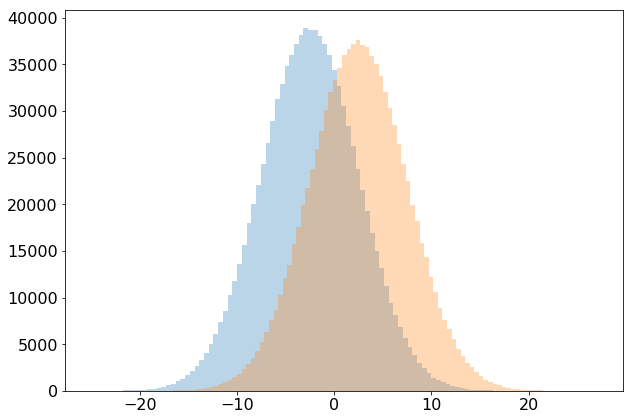

In [115]:
# Plotting the distributions of the first feature
plt.hist(data1[:, 0], bins=100, alpha=0.3)
plt.hist(data2[:, 0], bins=100, alpha=0.3);

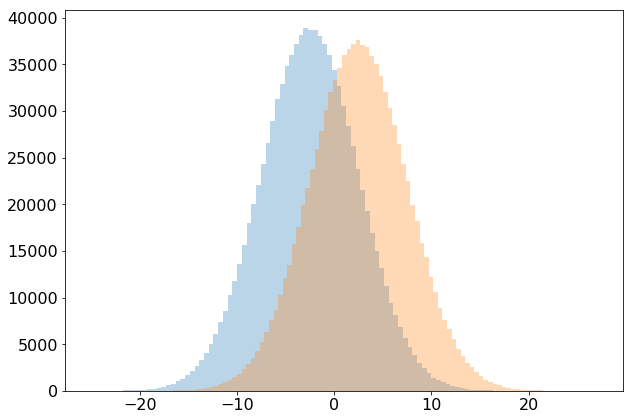

In [116]:
# Trying with mergning data first
data = np.concatenate([data1_labelled, data2_labelled])
var0_data1 = data[data[:,25]==1][:,0]
var0_data2 = data[data[:,25]==2][:,0]
plt.hist(var0_data1, bins=100, alpha=0.3)
plt.hist(var0_data2, bins=100, alpha=0.3);

In [117]:
# compute distances for a test observation
unknown_obs = np.random.randn(25)
print(unknown_obs)

[ 0.08534996 -0.90594312  0.36010431 -0.11496507 -0.80670916 -0.24230485
  0.00910764 -1.68357274  1.13905917 -0.64933284 -0.4160367  -0.75426054
  0.52528613  1.19879446  1.07407072 -0.09139532  0.578761    0.39192501
 -0.01565914 -1.39622044 -0.27483329  0.06330462  1.53153807  1.13946871
 -0.77817651]


In [118]:
# Get the distances with all data
distances = np.sum((data[:, :25]-unknown_obs)**2, axis=1)**(0.5)

In [119]:
# Add the dataset label to the distances
distances = distances.reshape(2*Nobs, 1)
flags = data[:, 25].reshape(2*Nobs, 1)
distances = np.append(distances, flags, axis=1)
print(distances.shape)

(2000000, 2)


In [120]:
# Rank the distances
sorted_arg = np.argsort(distances[:,0])
sdistances = distances[sorted_arg]

In [121]:
# Get the number of neighbor type 1 and type 2 among the k nearest neighbor
kMax=500
Nb1 = [len(sdistances[:k][sdistances[:k, 1]==1]) for k in np.arange(0,kMax)]
Nb2 = [len(sdistances[:k][sdistances[:k, 1]==2]) for k in np.arange(0,kMax)]

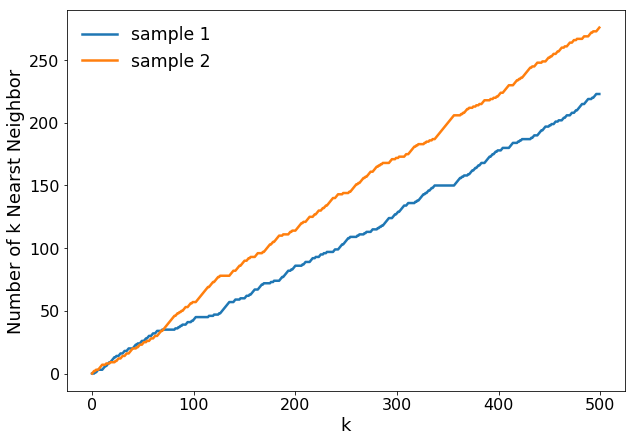

In [122]:
plt.plot(Nb1, label='sample 1')
plt.plot(Nb2, label='sample 2')
plt.ylabel('Number of k Nearst Neighbor')
plt.xlabel('k')
plt.legend();

In [133]:
def get_kNN(o, d1, d2, kmax=500):
    
    '''
    Compute the number of nearest neighbors (up to kmax) of an 
    observation `o` for two sample `d1` and `d2`.
    
    return N1, N2 (array of neighbors number for each k<kmax)
    '''
    
    # Compute distances
    r1 = np.sum((d1-o)**2, axis=1)**(0.5)
    r2 = np.sum((d2-o)**2, axis=1)**(0.5)
    
    # Define labels for each dataset
    l1 = np.zeros((d1.shape[0], 1))+1
    l2 = np.zeros((d2.shape[0], 1))+2
    
    # Add them to distance array
    r1 = np.append(r1.reshape(d1.shape[0], 1), l1, axis=1)
    r2 = np.append(r2.reshape(d2.shape[0], 1), l2, axis=1)
    
    # Merge the distances of the two datasets
    r = np.concatenate([r1, r2], axis=0)
    
    # Sort the distances
    arg = np.argsort(r[:, 0])
    r = r[arg]
    
    # Count the neighbor 1 and 2 around the observation
    N1 = [len(r[:k][r[:k, 1]==1]) for k in np.arange(0,kmax)]
    N2 = [len(r[:k][r[:k, 1]==2]) for k in np.arange(0,kmax)]
    
    # Return the array of number of nearest neighbor
    return [N1, N2]


def plot_kNN(kNN_array):
    for i, kNN in  enumerate(kNN_array):
        plt.plot(kNN, label='Sample {}'.format(i+1))
    plt.ylabel('Number of k Nearst Neighbor')
    plt.xlabel('k')
    plt.legend()
    return

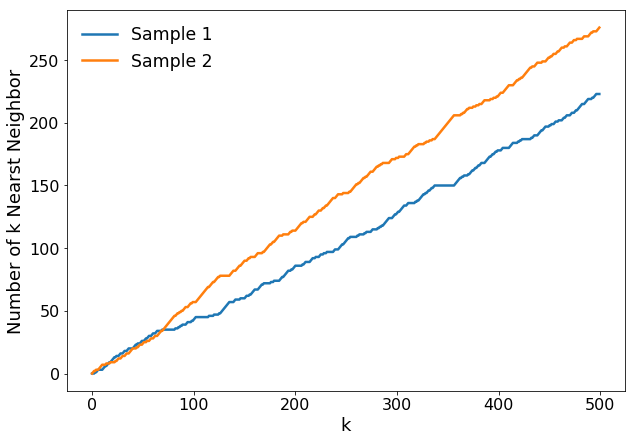

In [151]:
# Plot one observation
kNN = get_kNN(unknown_obs, data1[:, :25], data2[:, :25])
plot_kNN(kNN)

In [312]:
# Generate pseudo data like data1 and data2
data_obs_like1 = 3*np.random.randn(10000,25)+10
data_obs_like2 = np.random.randn(10000,25)+1.5

In [313]:
#res1 = [get_kNN(o, data1, data2, 5) for o in data_obs_like1[:10]]
# Build the score
#def kNNscore(data, d1, d2, k=10):
#    get_kNN

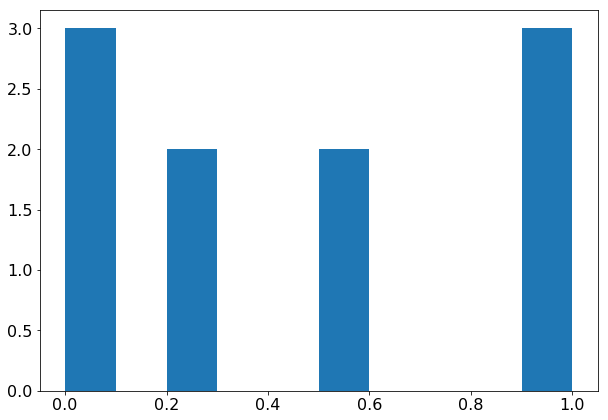

In [314]:
kNN1 = np.array([r[0][-1] for r in res1])
kNN2 = np.array([r[1][-1] for r in res1])
score = kNN2/(kNN1+kNN2)
plt.hist(score);

In [315]:
def get_kNN_vec(o, d1, d2, kmax=500):
    
    '''
    Compute the number of nearest neighbors (up to kmax) of an 
    observation `o` for two sample `d1` and `d2`.
    
    return N1, N2 (array of neighbors number for each k<kmax)
    '''
    
    # Get some numbers (o must be a 2D array)
    nd, nv = o.shape[0], o.shape[1]
    n1, n2 = d1.shape[0], d2.shape[0]
    
    # Prepare proper broadcasting
    d1 = d1.reshape(1, n1, nv)
    d2 = d2.reshape(1, n2, nv)
    o = o.reshape(nd, 1, nv)
    
    # Compute distances
    r1 = np.sum((d1-o)**2, axis=2)**(0.5)
    r2 = np.sum((d2-o)**2, axis=2)**(0.5)
    
    # Define labels for each dataset
    l1 = np.zeros(shape=(nd, n1, 1))+1
    l2 = np.zeros(shape=(nd, n2, 1))+2
    
    # Add them to distance array
    r1 = np.append(r1.reshape(*r1.shape, 1), l1, axis=2)
    r2 = np.append(r2.reshape(*r2.shape, 1), l2, axis=2)
    
    # Merge the distances of the two datasets
    r = np.concatenate([r1, r2], axis=1)
    
    # Sort the distances along distances
    r = np.sort(r, axis=1)

    # Count the neighbor 1 and 2 around the observation
    N1 = np.count_nonzero(r[:, :kmax, 1]==1, axis=1)
    N2 = np.count_nonzero(r[:, :kmax, 1]==2, axis=1)
    
    # Return the array of number of nearest neighbor
    return N1, N2


In [316]:
N1, N2 = get_kNN_vec(data_obs_like1[:100], data1[:100], data2[:100], kmax=10)

In [318]:
N1, N2 # didn't change when changing data_obs_like1 mean ... it doesn't make sense to be aleways closer to data1

(array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))